In [6]:
# === Imports & Path Fix ===
import pandas as pd
import numpy as np
import yfinance as yf
import sys, os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from utils.backtest_utility import market_neutral_weights, backtest_portfolio, plot_equity_curve


In [7]:
# === Step 1: Load Price Data ===
tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")["Close"]
data = data.dropna()
data.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-02,72.716072,94.900497,68.046204,153.323257
2020-01-03,72.009117,93.748497,67.712273,151.414139
2020-01-06,72.582901,95.143997,69.381882,151.805496
2020-01-07,72.241547,95.343002,69.338577,150.421402
2020-01-08,73.403641,94.598503,69.885002,152.817322


In [8]:
# === Step 2: Create Momentum Signal (past 5-day return) ===
momentum_signal = data.pct_change(5)
momentum_signal = momentum_signal.dropna()
momentum_signal.tail()


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-12-23,-0.019701,-0.029706,-0.011556,-0.024357
2022-12-27,-0.017678,-0.022138,-0.013685,-0.014514
2022-12-28,-0.047317,-0.039559,-0.035368,-0.030066
2022-12-29,-0.043115,-0.029849,-0.014404,-0.013992
2022-12-30,-0.017394,0.002506,0.005325,0.006843


In [9]:
# === Step 3: Convert Signal to Weights ===
weights = momentum_signal.apply(market_neutral_weights, axis=1)
weights.tail()


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-12-23,0.071436,-0.367269,0.428564,-0.132731
2022-12-27,-0.058031,-0.441969,0.285704,0.214296
2022-12-28,-0.430913,-0.069087,0.126379,0.373621
2022-12-29,-0.398834,-0.101166,0.245369,0.254631
2022-12-30,-0.500000,0.095310,0.179637,0.225053


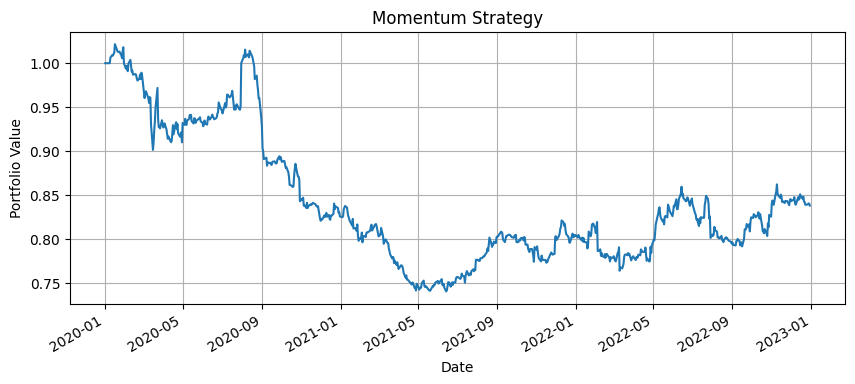

In [10]:
# === Step 4: Backtest Strategy ===
equity_curve = backtest_portfolio(data, weights)
plot_equity_curve(equity_curve, "Momentum Strategy")
